# Logistic Regression in Python With Statsmodels

## Import packages

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(123)

## Generate Data

Problem statement: Try to predict if a plane will land on time (less than 15 minutes delay on arrival) given information on the departure delay.

We collected 30 measurements for a single flight connection.

In [3]:
arrival_delay_minutes = [-2, 20, 0, -9, -21, 1, -9, 40, -17, 16, -23, 39, 0, -16, -21, -32, -49, -41, 23, -15, -13, -55, -9, 24, 16, 23, 6, -8, 15, 11]
arrival_delay_15 = [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
departure_delay_minutes = [5, 0, 10, 0, 0, 13, 0, 27, 0, 20, 0, 27, 0, 0, 1, 0, 0, 0, 7, 0, 1, 0, 0, 33, 12, 16, 12, 5, 22, 25]
#departure_delay_5 = [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]

Plot distribution

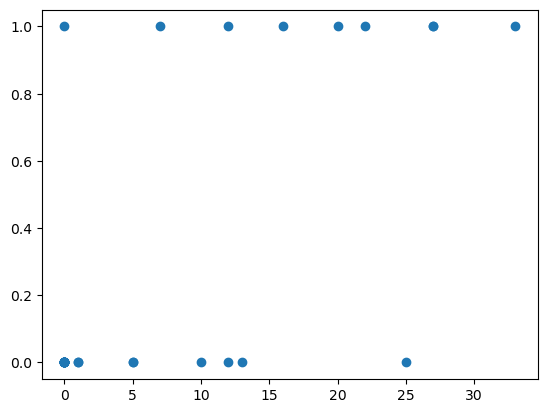

In [4]:
plt.scatter(departure_delay_minutes, arrival_delay_15);

Be careful - points are overlapping!

## Buidling the Logistic Regression Model

### `departure_delay_minutes` vs. `arrival_delay_15`

In [5]:
y = arrival_delay_15
X = departure_delay_minutes
X = sm.add_constant(X) # Add constant to estimte intercept parameter
res = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.380940
         Iterations 6


#### Inspect Summary

In [6]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.3764
Time:                        15:52:57   Log-Likelihood:                -11.428
converged:                       True   LL-Null:                       -18.326
Covariance Type:            nonrobust   LLR p-value:                 0.0002038
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5057      0.805     -3.114      0.002      -4.083      -0.929
x1             0.1730      0.060      2.877      0.004       0.055       0.291


#### Inspect fitted points

In [7]:
res.predict()

array([0.16233506, 0.07545683, 0.31514541, 0.07545683, 0.07545683,
       0.43602696, 0.07545683, 0.8969782 , 0.07545683, 0.72179728,
       0.07545683, 0.8969782 , 0.07545683, 0.07545683, 0.08844409,
       0.07545683, 0.07545683, 0.07545683, 0.21500056, 0.07545683,
       0.08844409, 0.07545683, 0.07545683, 0.96090312, 0.39406448,
       0.56502161, 0.39406448, 0.16233506, 0.78571843, 0.86034731])

#### Plot fitted points

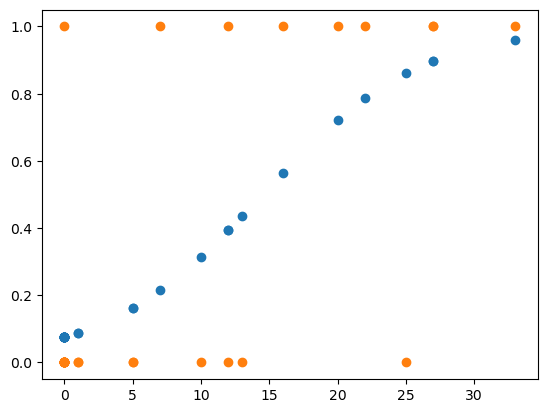

In [8]:
plt.scatter(departure_delay_minutes, res.predict())
plt.scatter(departure_delay_minutes, y)

We can see the typical s-curve shape centered around 0.5 and converging to +1 and -1.

#### Predict new values

In [9]:
X_new = [2, -5, 10, 15, 45]
X_new = sm.add_constant(X_new)
y_preds = res.predict(X_new)
y_preds

array([0.10341661, 0.03322953, 0.31514541, 0.52213825, 0.9949198 ])

In [11]:
y_preds_label = y_preds > 0.5
y_preds_label

array([False, False, False,  True,  True])